## Cài đặt CNN sử dụng tensorflow ##

Chào mừng các bạn đến với bài tập dễ nhất từ đầu khóa học. Trong bài tập này, các bạn sẽ học cách cài đặt một CNN đơn giản sử dụng tensorflow. Bạn sẽ dùng CNN này để phân loại các bức ảnh trong bộ dữ liệu CIFAR.

Trước tiên ta cần import tensorflow.

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Tải xuống và chuẩn bị tập dữ liệu CIFAR10 ###

Bộ dữ liệu CIFAR10 chứa 60.000 hình ảnh màu thuộc 10 lớp, với 6.000 hình ảnh trong mỗi lớp. Bộ dữ liệu được chia thành 50.000 ảnh train và 10.000 ảnh test. Mỗi ảnh trong bộ dữ liệu chỉ thuộc duy nhất 1 lớp.

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Xác minh dữ liệu###

Để xác minh rằng tập dữ liệu có đúng không, hãy vẽ 25 hình ảnh đầu tiên từ tập hợp đào tạo và hiển thị tên lớp bên dưới mỗi hình ảnh.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Xây dựng CNN###

Lớp nền convolution gồm các convolution layer và polling layer.

Chúng ta sẽ xây dựng một CNN có cấu trúc như sau:
Input -> Conv -> MaxPool -> Conv -> MaxPool -> Conv -> FC -> FC -> Softmax

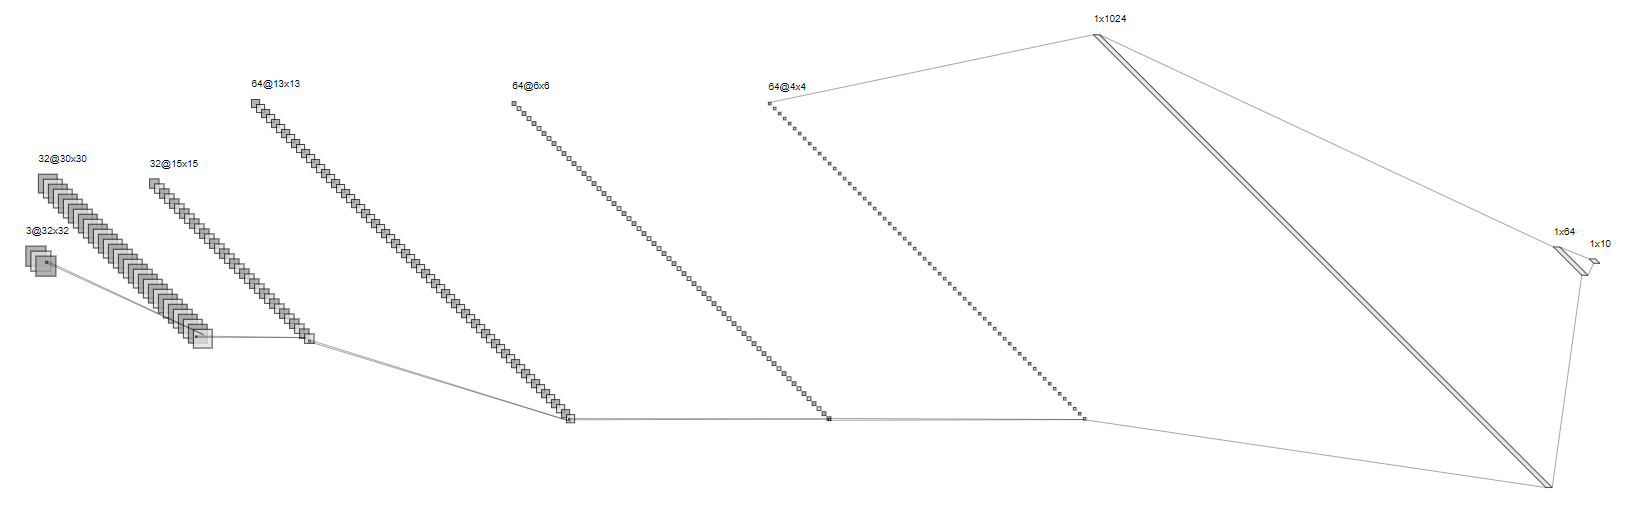

Đầu vào của các bạn là bức ảnh kích thước 32x32x3. 

Ở lớp convolution đầu tiên, bạn dùng 32 filter kích thước 3x3x3 và thu được output kích thước 30x30x32. 

Sau đó áp dụng max pooling với kích thước kernel 2x2 và thu được output 15x15x32. 

Ở lớp convolution thứ 2, bạn dùng 64 filter kích thước 3x3x32 và thu được output 13x13x64. 

Tiếp tục áp dụng max pooling với kích thước kernel 2x2 và thu được output 6x6x64.

Ở lớp convolution thứ 3, bạn dùng 64 filter kích thước 3x3x64 và thu được output 4x4x64.

Sau đó bạn flatten output này để thu được vector kích thước 1024.

Sau đó bạn thêm 2 lớp Fully Connected Layer (còn gọi là Dense Layer) với kích thước lần lượt là 64 và 10. 

Lớp output có kích thước là 10 vì ta cần phân loại 10 lớp.


Thông thường để cài đặt CNN, bạn cần phải biết kích thước đầu vào, đầu ra, số chanel mỗi lớp, kích thước mỗi filter, số filter, etc. Nhưng khi cài đặt sử dụng tensorflow, bạn chỉ cần khai báo rất ít thông số, các thông số còn lại được tensorflow xác định thay cho bạn.


Toàn bộ CNN vừa mô tả có thể được cài đặt với 10 dòng code dưới đây:

In [ ]:
model = models.Sequential()
# Lớp convolution đầu tiên, số filter = 32, kích thước mỗi filter là 3x3, activation là ReLU. 
# Do đây là lớp đầu tiên nên ta khai báo kích thước đầu vào
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Lớp max pooling với kích thước kernel 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Lớp convolution thứ hai, số filter = 64, kích thước mỗi filter là 3x3, activation là ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### START CODE HERE ###
# Lớp max pooling với kích thước kernel 2x2
model.add(...)
# Lớp convolution thứ 3, số filter 64, kích thước mỗi filter là 3x3, activation là ReLU
model.add(...)
### end CODE HERE ###

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

### Compile and train the model###

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Đánh giá mô hình

313/313 - 3s - loss: 0.8775 - accuracy: 0.7108


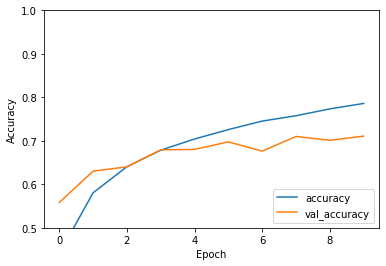

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Mô hình CNN của chúng ta có độ chính xác 70%, một kết quả không tệ cho hơn 10 dòng code.